In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
df = pd.read_csv("/content/drive/My Drive/vqa/Compasbias/finaldata.csv")
df = df.drop(columns=['Unnamed: 0'])

In [23]:
df1=df

In [ ]:
df.head()

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,is_recid
0,69,Male,1,0,Other,0.0,1.0,0,0
1,34,Male,3,0,African-American,10.0,1.0,1,1
2,24,Male,4,4,African-American,1.0,1.0,0,1
3,23,Male,8,1,African-American,0.0,1.0,0,0
4,43,Male,1,2,Other,0.0,76.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 7214 non-null   int64  
 1   sex                 7214 non-null   object 
 2   decile_score        7214 non-null   int64  
 3   priors_count        7214 non-null   int64  
 4   race                7214 non-null   object 
 5   days_in_jail        7214 non-null   float64
 6   c_days_from_compas  7214 non-null   float64
 7   is_violent_recid    7214 non-null   int64  
 8   is_recid            7214 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 507.4+ KB


Cross Tabulation:
race    African-American  Asian  Caucasian  Hispanic  Native American  Other
sex                                                                         
Female               652      2        567       103                4     67
Male                3044     30       1887       534               14    310


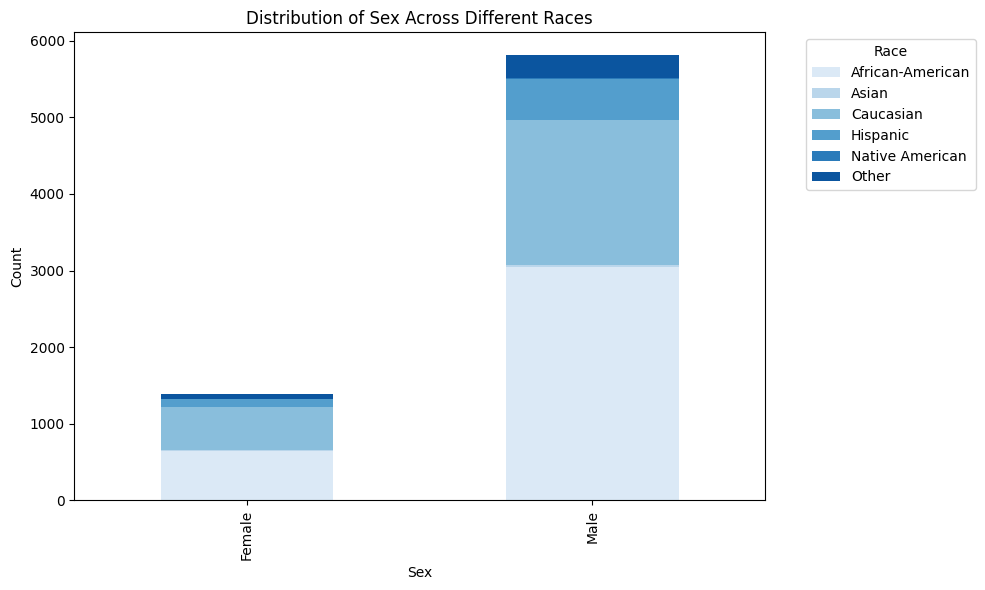

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(df1['sex'], df1['race'])

# Display the cross-tabulation
print("Cross Tabulation:")
print(cross_tab)

colors = sns.color_palette("Blues", n_colors=cross_tab.shape[1])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)
plt.title("Distribution of Sex Across Different Races")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


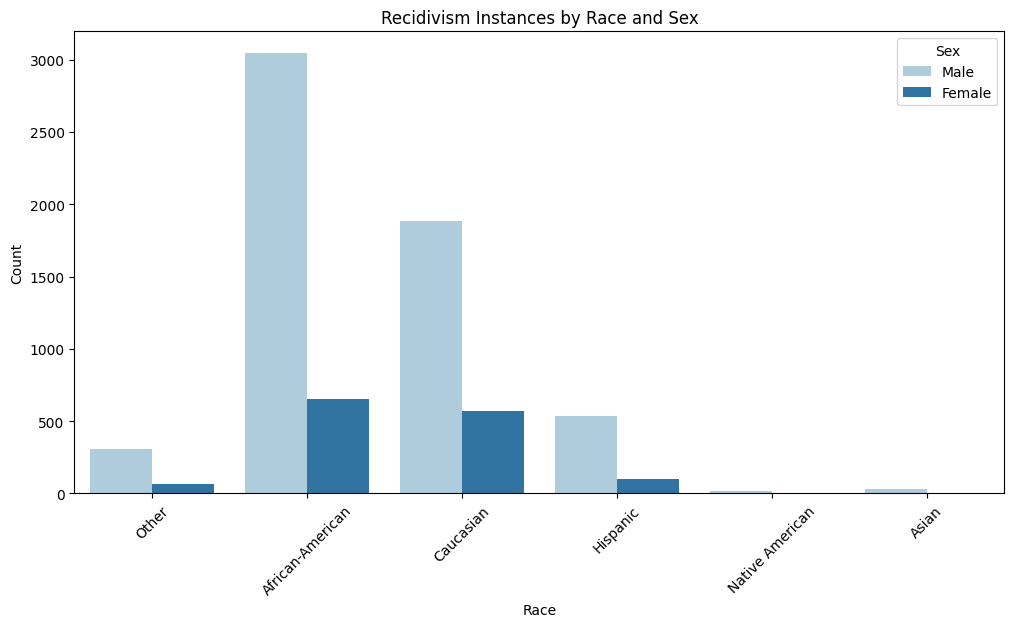

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='race', hue='sex', palette='Paired', hue_order=['Male', 'Female'])
plt.title('Recidivism Instances by Race and Sex')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Remove
filtered_df = df




---



---



---

In this part i try to combine sex column with race column and we can see the result as below

In [ ]:
filtered_df['sex_race'] = filtered_df['sex'] + '-' + filtered_df['race']
filtered_df

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,sex_race
0,69,Male,1,0,Other,0.0,1.0,0,0,Male-Other
1,34,Male,3,0,African-American,10.0,1.0,1,1,Male-African-American
2,24,Male,4,4,African-American,1.0,1.0,0,1,Male-African-American
3,23,Male,8,1,African-American,0.0,1.0,0,0,Male-African-American
4,43,Male,1,2,Other,0.0,76.0,0,0,Male-Other
...,...,...,...,...,...,...,...,...,...,...
7209,23,Male,7,0,African-American,1.0,1.0,0,0,Male-African-American
7210,23,Male,3,0,African-American,1.0,1.0,0,0,Male-African-American
7211,57,Male,1,0,Other,1.0,1.0,0,0,Male-Other
7212,33,Female,2,3,African-American,1.0,1.0,0,0,Female-African-American


In [ ]:
filtered_df = pd.get_dummies(filtered_df, columns=['sex_race'])

In [ ]:
filtered_df.head(3)

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,sex_race_Female-African-American,sex_race_Female-Asian,sex_race_Female-Caucasian,sex_race_Female-Hispanic,sex_race_Female-Native American,sex_race_Female-Other,sex_race_Male-African-American,sex_race_Male-Asian,sex_race_Male-Caucasian,sex_race_Male-Hispanic,sex_race_Male-Native American,sex_race_Male-Other
0,69,Male,1,0,Other,0.0,1.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True
1,34,Male,3,0,African-American,10.0,1.0,1,1,False,False,False,False,False,False,True,False,False,False,False,False
2,24,Male,4,4,African-American,1.0,1.0,0,1,False,False,False,False,False,False,True,False,False,False,False,False




---



---

Then rename the column to meaningfull name

In [ ]:
filtered_df = filtered_df.rename(columns={'sex_race_Female-African-American': 'Female-African-American', 'sex_race_Female-Caucasian': 'Female-Caucasian','sex_race_Female-Hispanic': 'Female-Hispanic','sex_race_Male-African-American': 'Male-African-American',
                        'sex_race_Male-Caucasian':'Male-Caucasian','sex_race_Male-Hispanic':'Male-Hispanic','sex_race_Female-Asian':'Female-Asian','sex_race_Female-Native American':'Female-Native-American','sex_race_Female-Other':'Female-Other','sex_race_Male-Asian':'Male-Asian',
                        'sex_race_Male-Native American':'Male-Native-American','sex_race_Male-Other':'Male-Other'})




---



---



---
After combining we don't need the sex and race columns so we should drop them


In [ ]:
filtered_df=filtered_df.drop(['sex','race'],axis=1)

In [ ]:
filtered_df.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,Female-African-American,Female-Asian,Female-Caucasian,Female-Hispanic,Female-Native-American,Female-Other,Male-African-American,Male-Asian,Male-Caucasian,Male-Hispanic,Male-Native-American,Male-Other
0,69,1,0,0.0,1.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True
1,34,3,0,10.0,1.0,1,1,False,False,False,False,False,False,True,False,False,False,False,False
2,24,4,4,1.0,1.0,0,1,False,False,False,False,False,False,True,False,False,False,False,False
3,23,8,1,0.0,1.0,0,0,False,False,False,False,False,False,True,False,False,False,False,False
4,43,1,2,0.0,76.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7214 non-null   int64  
 1   decile_score             7214 non-null   int64  
 2   priors_count             7214 non-null   int64  
 3   days_in_jail             7214 non-null   float64
 4   c_days_from_compas       7214 non-null   float64
 5   is_violent_recid         7214 non-null   int64  
 6   is_recid                 7214 non-null   int64  
 7   Female-African-American  7214 non-null   bool   
 8   Female-Asian             7214 non-null   bool   
 9   Female-Caucasian         7214 non-null   bool   
 10  Female-Hispanic          7214 non-null   bool   
 11  Female-Native-American   7214 non-null   bool   
 12  Female-Other             7214 non-null   bool   
 13  Male-African-American    7214 non-null   bool   
 14  Male-Asian              

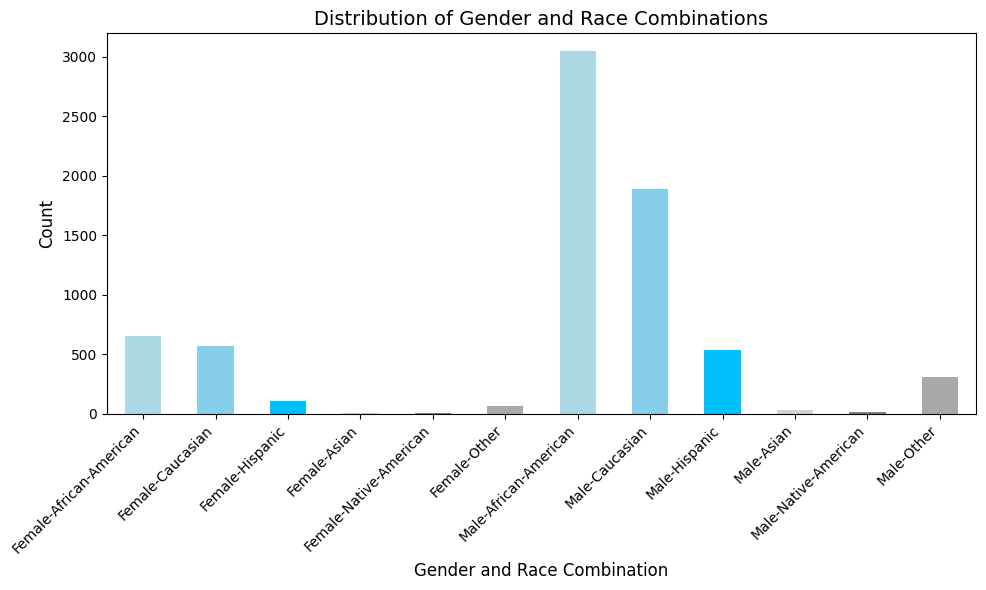

In [ ]:
import matplotlib.pyplot as plt


dummy_columns = ['Female-African-American', 'Female-Caucasian', 'Female-Hispanic','Female-Asian','Female-Native-American','Female-Other',
                 'Male-African-American', 'Male-Caucasian', 'Male-Hispanic','Male-Asian','Male-Native-American','Male-Other']

# Calculate the counts for each dummy variable
dummy_counts = filtered_df[dummy_columns].sum()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
dummy_counts.plot(kind='bar', color=['lightblue', 'skyblue', 'deepskyblue', 'lightgray', 'gray', 'darkgray'
])

# Add titles and labels
plt.title('Distribution of Gender and Race Combinations', fontsize=14)
plt.xlabel('Gender and Race Combination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()




---

Save the dataset as final data that we should predict on it

In [ ]:
filtered_df.to_csv('/content/drive/My Drive/vqa/Compasbias/Combine/combinedataF1.csv')

# Feature Importance

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
df["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)
df = pd.get_dummies(df, columns=['sex'])
df = pd.get_dummies(df, columns=['race'])

label_encoder = LabelEncoder()
df = df.rename(columns={'sex_1': 'male', 'sex_0': 'Female'})
label_encoder = LabelEncoder()
df['male'] = label_encoder.fit_transform(df['male'])
df['Female'] = label_encoder.fit_transform(df['Female'])

df['race_African-American'] = label_encoder.fit_transform(df['race_African-American'])
df['race_Asian'] = label_encoder.fit_transform(df['race_Asian'])
df['race_Asian'] = label_encoder.fit_transform(df['race_Asian'])
df['race_Hispanic'] = label_encoder.fit_transform(df['race_Hispanic'])
df['race_Native American'] = label_encoder.fit_transform(df['race_Native American'])
df['race_Other'] = label_encoder.fit_transform(df['race_Other'])


In [25]:
# Correct way to drop the target column
X = df.drop(columns=['is_recid'])
Y = df['is_recid']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
X_train.columns

Index(['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female', 'male',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other'],
      dtype='object')



---



---
We should scale input data after splitting it prevent the data leakges


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# 1. Statistical Method: ANOVA
anova_selector = SelectKBest(score_func=f_classif, k='all')
X_train_anova = anova_selector.fit_transform(X_train_scaled, Y_train)

anova_feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA Score': anova_selector.scores_
}).sort_values(by='ANOVA Score', ascending=False)

print("\nANOVA Feature Scores:")
print(anova_feature_scores)


ANOVA Feature Scores:
                  Feature  ANOVA Score
5        is_violent_recid   916.109379
1            decile_score   837.922965
2            priors_count   465.156643
0                     age   243.700663
8   race_African-American   111.683283
3            days_in_jail    98.229252
6                  Female    62.300284
7                    male    62.300284
10         race_Caucasian    46.020078
4      c_days_from_compas    29.699597
11          race_Hispanic    17.813785
13             race_Other    12.044116
9              race_Asian     2.601809
12   race_Native American     0.753108


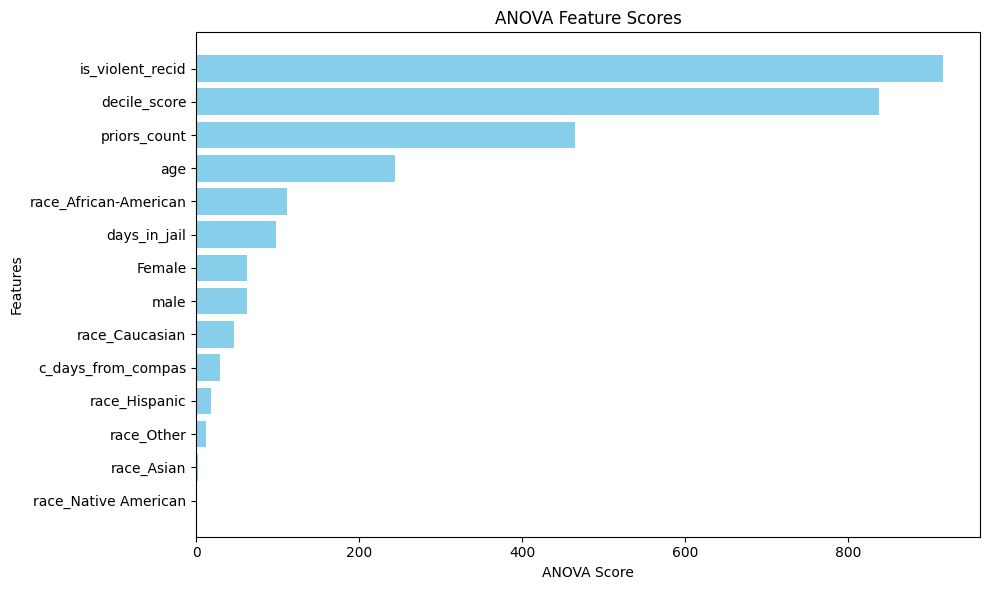

In [29]:
X_columns = X.columns

# ANOVA Feature Scores
plt.figure(figsize=(10, 6))
plt.barh(anova_feature_scores['Feature'], anova_feature_scores['ANOVA Score'], color='skyblue')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.title('ANOVA Feature Scores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---



---



In [32]:
# 2. Statistical Method: Chi-Square Test
chi2_selector = SelectKBest(score_func=chi2, k='all')
X_train_chi2 = chi2_selector.fit_transform(X_train[['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female', 'male',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other']], Y_train)

chi2_feature_scores = pd.DataFrame({
    'Feature': ['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female', 'male',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other'],
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print("\nChi-Square Feature Scores:")
print(chi2_feature_scores)


Chi-Square Feature Scores:
                  Feature    Chi2 Score
4      c_days_from_compas  55925.691553
3            days_in_jail  13934.886800
2            priors_count   2975.912625
1            decile_score   1309.712295
0                     age    949.052158
5        is_violent_recid    699.438410
8   race_African-American     53.290286
6                  Female     49.423130
10         race_Caucasian     30.247314
11          race_Hispanic     16.164368
7                    male     12.232919
13             race_Other     11.408593
9              race_Asian      2.589366
12   race_Native American      0.751313


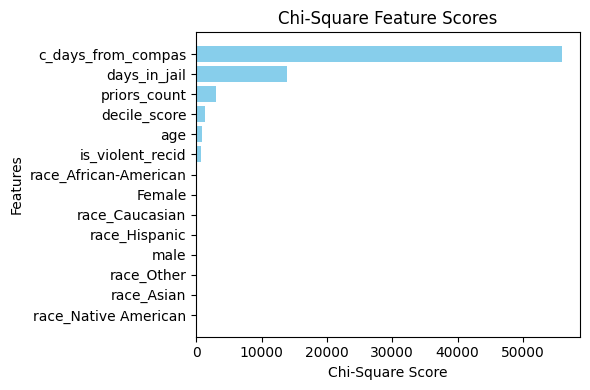

In [33]:
plt.figure(figsize=(6, 4))
plt.barh(chi2_feature_scores['Feature'], chi2_feature_scores['Chi2 Score'], color='skyblue')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Chi-Square Feature Scores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---



---
## This is the model based


In [34]:
# 3. Model-Based: Random Forest Feature Importance
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, Y_train)

rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance Score': random_forest.feature_importances_
}).sort_values(by='Importance Score', ascending=False)

print("\nRandom Forest Feature Importances:")
print(rf_feature_importance)


Random Forest Feature Importances:
                  Feature  Importance Score
0                     age          0.254627
1            decile_score          0.159477
2            priors_count          0.155096
3            days_in_jail          0.144946
5        is_violent_recid          0.117384
4      c_days_from_compas          0.112702
8   race_African-American          0.012932
10         race_Caucasian          0.011335
7                    male          0.008587
6                  Female          0.008246
11          race_Hispanic          0.007423
13             race_Other          0.005686
9              race_Asian          0.000903
12   race_Native American          0.000656


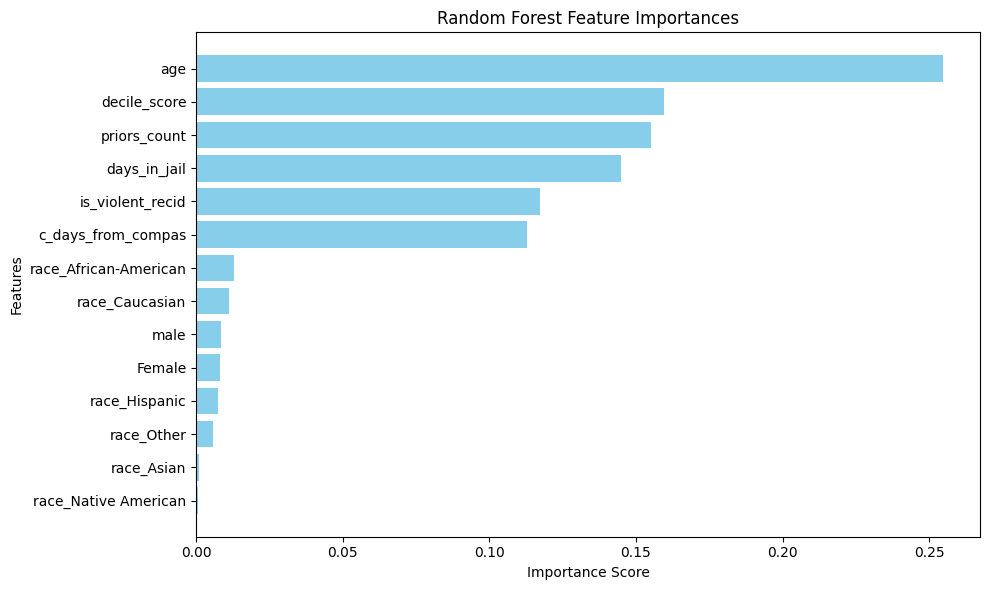

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance Score'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---



---



In [36]:
# 4. Recursive Feature Elimination (RFE)
rfe_selector = RFE(random_forest, n_features_to_select=5, step=1)
rfe_selector = rfe_selector.fit(X_train_scaled, Y_train)

rfe_selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe_selector.support_,
    'Ranking': rfe_selector.ranking_
}).sort_values(by='Ranking')

print("\nRFE Selected Features:")
print(rfe_selected_features)


RFE Selected Features:
                  Feature  Selected  Ranking
0                     age      True        1
1            decile_score      True        1
2            priors_count      True        1
3            days_in_jail      True        1
5        is_violent_recid      True        1
4      c_days_from_compas     False        2
8   race_African-American     False        3
7                    male     False        4
10         race_Caucasian     False        5
11          race_Hispanic     False        6
6                  Female     False        7
13             race_Other     False        8
9              race_Asian     False        9
12   race_Native American     False       10


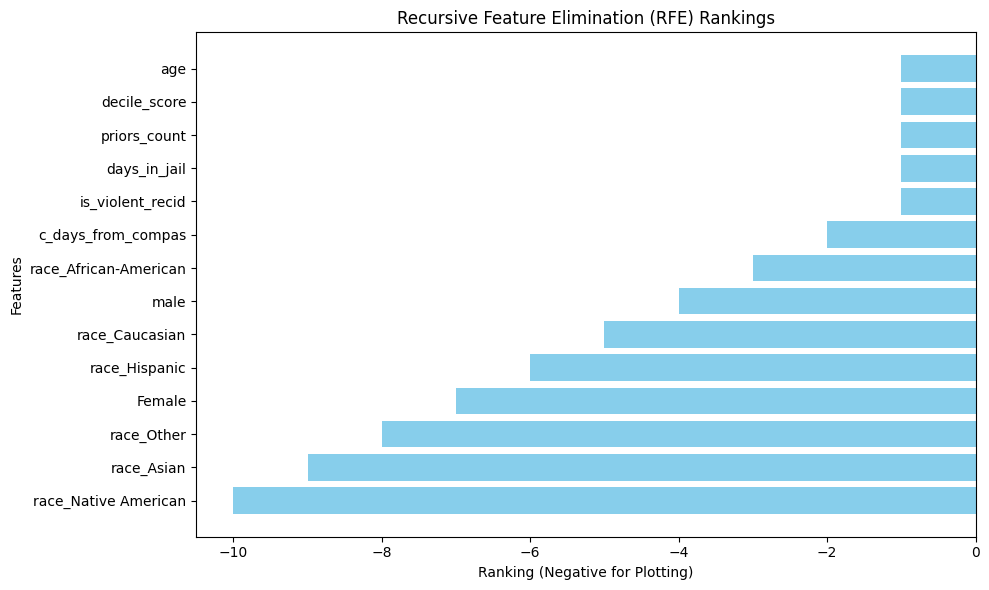

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(rfe_selected_features['Feature'], -rfe_selected_features['Ranking'], color='skyblue')
plt.xlabel('Ranking (Negative for Plotting)')
plt.ylabel('Features')
plt.title('Recursive Feature Elimination (RFE) Rankings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()